In [1]:
import pandas as pd
std = pd.read_csv('/Users/alexscar55/Documents/Mgmt 690/Final Files/std.csv')

In [2]:
# Make sure your timestamp column is of datetime type
std['Time Stamp'] = pd.to_datetime(std['Time Stamp'])

In [3]:
# Set the timestamp column as the index
std.set_index('Time Stamp', inplace=True)

In [4]:
import pandas as pd
hourly = pd.read_csv('/Users/alexscar55/Documents/Mgmt 690/Final Files/hourly.csv')

In [5]:
# Make sure your timestamp column is of datetime type
hourly['Time Stamp'] = pd.to_datetime(hourly['Time Stamp'])

In [6]:
# Set the timestamp column as the index
hourly.set_index('Time Stamp', inplace=True)

In [7]:
import pandas as pd
median = pd.read_csv('/Users/alexscar55/Documents/Mgmt 690/Final Files/median.csv')

In [8]:
# Make sure your timestamp column is of datetime type
median['Time Stamp'] = pd.to_datetime(median['Time Stamp'])

In [9]:
# Set the timestamp column as the index
median.set_index('Time Stamp', inplace=True)

In [ ]:
#STD

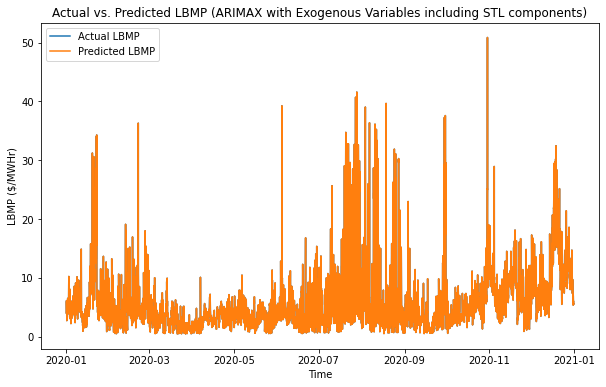

Root Mean Squared Error (RMSE): 3.3529064290401363e-15
Mean Squared Error (MSE): 1.124198152189868e-29
Mean Absolute Percentage Error (MAPE): 5.293236640872295e-14
Runtime: 0.806102991104126 seconds


In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

# Load your data into 'std' DataFrame
# Assuming 'std' is your DataFrame with LBMP and exogenous variables
std.index = pd.date_range(start=std.index[0], periods=len(std), freq='H')

# Define exogenous variables
exog_vars = std[['Marginal Cost Congestion ($/MWHr)', 'LBMP_lag_1h', 'LBMP_lag_2h',
             'LBMP_lag_3h', 'LBMP_lag_22h', 'LBMP_lag_23h', 'LBMP_lag_24h',
             'LBMP_lag_2d', 'rolling_mean_3h', 'rolling_mean_12h']]

# Start measuring runtime
start_time = time.time()

# Perform seasonal decomposition
decomposition = seasonal_decompose(std['LBMP ($/MWHr)'], period=1)  # Assuming daily seasonality

# Access the seasonal, trend, and residual components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Combine the components into a DataFrame
stl_components = pd.DataFrame({'Seasonal': seasonal, 'Trend': trend, 'Residual': residual}, index=std.index)

# Combine the exogenous variables with the STL components
exog_vars_arimax = pd.concat([exog_vars, stl_components], axis=1)

# Fit ARIMAX model with exogenous variables
model = sm.tsa.ARIMA(std.loc[exog_vars_arimax.index]['LBMP ($/MWHr)'],
                     exog=exog_vars_arimax, order=(2, 0, 0), trend='n')

# Specify optimization method and its parameters
results = model.fit(method='hannan_rissanen')

# Predict LBMP one hour ahead using the fitted ARIMAX model
std['LBMP_Prediction'] = results.predict(exog=exog_vars_arimax)

# End measuring runtime
end_time = time.time()

# Plot actual vs. predicted LBMP values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(std.index, std['LBMP ($/MWHr)'], label='Actual LBMP')
plt.plot(std.index, std['LBMP_Prediction'], label='Predicted LBMP')
plt.xlabel('Time')
plt.ylabel('LBMP ($/MWHr)')
plt.title('Actual vs. Predicted LBMP (ARIMAX with Exogenous Variables including STL components)')
plt.legend()
plt.show()

# Drop NaN or infinite values from both actual and predicted LBMP values
actual_values = std['LBMP ($/MWHr)']
predicted_values = std['LBMP_Prediction']

# Align indices to ensure consistency
actual_values = actual_values.loc[predicted_values.index]

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mse = mean_squared_error(actual_values, predicted_values)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate and print runtime
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")


In [ ]:
#MEAN

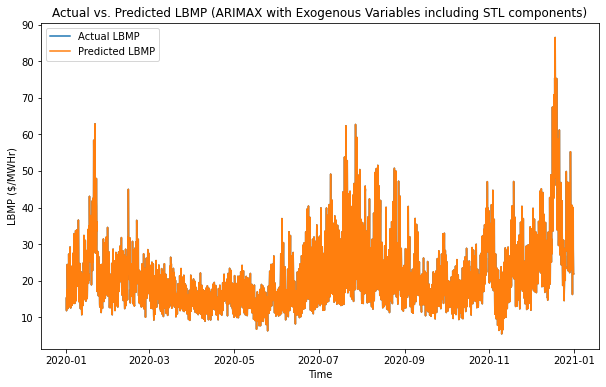

Root Mean Squared Error (RMSE): 2.4299989039533313e-14
Mean Squared Error (MSE): 5.904894673214392e-28
Mean Absolute Percentage Error (MAPE): 1.0676090599455631e-13
Runtime: 0.8878359794616699 seconds


In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

# Assuming 'hourly' is your DataFrame with LBMP and exogenous variables
hourly.index = pd.date_range(start=hourly.index[0], periods=len(hourly), freq='H')

# Define exogenous variables
exog_vars = hourly[['Marginal Cost Congestion ($/MWHr)', 'LBMP_lag_1h', 'LBMP_lag_2h',
             'LBMP_lag_3h', 'LBMP_lag_22h', 'LBMP_lag_23h', 'LBMP_lag_24h',
             'LBMP_lag_2d', 'rolling_mean_3h', 'rolling_mean_12h']]

# Start measuring runtime
start_time = time.time()

# Perform seasonal decomposition
decomposition = seasonal_decompose(hourly['LBMP ($/MWHr)'], period=1)  # Assuming daily seasonality

# Access the seasonal, trend, and residual components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Combine the components into a DataFrame
stl_components = pd.DataFrame({'Seasonal': seasonal, 'Trend': trend, 'Residual': residual}, index=hourly.index)

# Combine the exogenous variables with the STL components
exog_vars_arimax = pd.concat([exog_vars, stl_components], axis=1)

# Fit ARIMAX model with exogenous variables
model = sm.tsa.ARIMA(hourly.loc[exog_vars_arimax.index]['LBMP ($/MWHr)'],
                     exog=exog_vars_arimax, order=(2, 0, 0), trend='n')

# Specify optimization method and its parameters
results = model.fit(method='hannan_rissanen')

# Predict LBMP one hour ahead using the fitted ARIMAX model
hourly['LBMP_Prediction'] = results.predict(exog=exog_vars_arimax)

# End measuring runtime
end_time = time.time()

# Plot actual vs. predicted LBMP values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hourly.index, hourly['LBMP ($/MWHr)'], label='Actual LBMP')
plt.plot(hourly.index, hourly['LBMP_Prediction'], label='Predicted LBMP')
plt.xlabel('Time')
plt.ylabel('LBMP ($/MWHr)')
plt.title('Actual vs. Predicted LBMP (ARIMAX with Exogenous Variables including STL components)')
plt.legend()
plt.show()

# Drop NaN or infinite values from both actual and predicted LBMP values
actual_values = hourly['LBMP ($/MWHr)']
predicted_values = hourly['LBMP_Prediction']

# Align indices to ensure consistency
actual_values = actual_values.loc[predicted_values.index]

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mse = mean_squared_error(actual_values, predicted_values)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate and print runtime
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")


In [ ]:
#MEDIAN

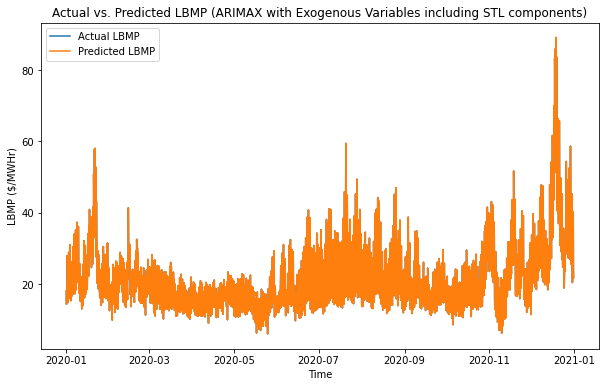

Root Mean Squared Error (RMSE): 3.142775225562281e-14
Mean Squared Error (MSE): 9.877036118408047e-28
Mean Absolute Percentage Error (MAPE): 1.3003959267969153e-13
Runtime: 0.9678096771240234 seconds


In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

# Assuming 'median' is your DataFrame with LBMP and exogenous variables
median.index = pd.date_range(start=median.index[0], periods=len(median), freq='H')

# Define exogenous variables
exog_vars = median[['Marginal Cost Congestion ($/MWHr)', 'LBMP_lag_1h', 'LBMP_lag_2h',
             'LBMP_lag_3h', 'LBMP_lag_22h', 'LBMP_lag_23h', 'LBMP_lag_24h',
             'LBMP_lag_2d', 'rolling_mean_3h', 'rolling_mean_12h']]

# Start measuring runtime
start_time = time.time()

# Perform seasonal decomposition
decomposition = seasonal_decompose(median['LBMP ($/MWHr)'], period=1)  # Assuming daily seasonality

# Access the seasonal, trend, and residual components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Combine the components into a DataFrame
stl_components = pd.DataFrame({'Seasonal': seasonal, 'Trend': trend, 'Residual': residual}, index=median.index)

# Combine the exogenous variables with the STL components
exog_vars_arimax = pd.concat([exog_vars, stl_components], axis=1)

# Fit ARIMAX model with exogenous variables
model = sm.tsa.ARIMA(median.loc[exog_vars_arimax.index]['LBMP ($/MWHr)'],
                     exog=exog_vars_arimax, order=(2, 0, 0), trend='n')

# Specify optimization method and its parameters
results = model.fit(method='hannan_rissanen')

# Predict LBMP one hour ahead using the fitted ARIMAX model
median['LBMP_Prediction'] = results.predict(exog=exog_vars_arimax)

# End measuring runtime
end_time = time.time()

# Plot actual vs. predicted LBMP values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(median.index, median['LBMP ($/MWHr)'], label='Actual LBMP')
plt.plot(median.index, median['LBMP_Prediction'], label='Predicted LBMP')
plt.xlabel('Time')
plt.ylabel('LBMP ($/MWHr)')
plt.title('Actual vs. Predicted LBMP (ARIMAX with Exogenous Variables including STL components)')
plt.legend()
plt.show()

# Drop NaN or infinite values from both actual and predicted LBMP values
actual_values = median['LBMP ($/MWHr)']
predicted_values = median['LBMP_Prediction']

# Align indices to ensure consistency
actual_values = actual_values.loc[predicted_values.index]

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mse = mean_squared_error(actual_values, predicted_values)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate and print runtime
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")
